In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from random import sample

In [4]:
iris = load_iris()

In [5]:
class k_means:
  def __init__(self, num_clusters=3):
    self.x = X
    self.num_clusters = num_clusters

  def fit(self, X):
    self.cluster_centers = self.create_random_clusters()

    end = False

    while not end:
      distances = self.calculate_distances(X)
      self.nearest_cluster = self.assign_to_cluster(distances)
      end = self.calculate_new_cluster_pos(X)
     

  def create_random_clusters(self):
    r = sample(range(self.x.shape[0]), self.num_clusters)

    clusters = np.array(X[r])
    return clusters

  def calculate_distances(self, X):
    distances = np.zeros((X.shape[0], self.num_clusters))
    for i, x in enumerate(X):
      for j in range(self.num_clusters):
        distances[i][j] = math.sqrt(sum([(p - q)**2 for p, q in zip(x, self.cluster_centers[j])]))

    return distances

  def assign_to_cluster(self, distances):
    return np.argmin(distances, axis=1)

  def calculate_new_cluster_pos(self, X):
    c = np.zeros(self.cluster_centers.shape)
    for i in range(self.num_clusters):
      points = X[np.where(self.nearest_cluster==i)]

      for j in range(X.shape[1]):
        c[i, j] = sum(points[:, j]) / points.shape[0]

    if not np.array_equal(c, self.cluster_centers):
      self.cluster_centers = c
      return False

    return True  

In [6]:
X = iris.data

k = k_means(num_clusters=3)
k.fit(X)

In [9]:
k.cluster_centers

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [10]:
k.nearest_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Resultado:

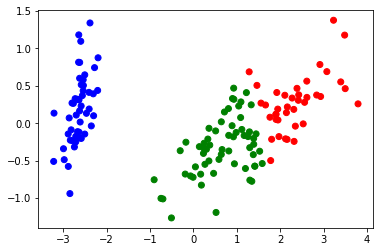

In [20]:
pca = PCA(n_components=2)
pca = pca.fit_transform(iris.data)

x = pca[:,0]
y = pca[:,1]

colors = ['green', 'blue', 'red']
c = []

c = [colors[x] for x in k.nearest_cluster]

plt.scatter(x, y, c=c)

Resultado Esperado

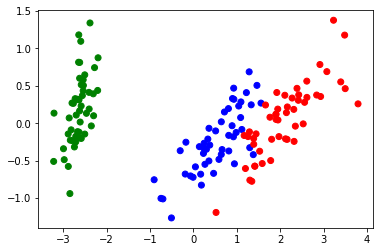

In [25]:
pca = PCA(n_components=2)
pca = pca.fit_transform(iris.data)

x = pca[:,0]
y = pca[:,1]

colors = ['green', 'blue', 'red']
c = []

c = [colors[x] for x in iris.target]

plt.scatter(x, y, c=c)